In [1]:
exec(open("../header.py", 'r').read())

In [19]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer

In [3]:
data = pd.read_csv(data_path/"abalone.csv")
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data["Sex"] = data["Sex"].replace({"F": -1, "I": 0, "M": 1})

In [6]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
X = data.drop(columns=["Rings"])
y = data["Rings"]

In [21]:
folder = KFold(n_splits=5, shuffle=True, random_state=1, )
cvgrid = GridSearchCV(RandomForestRegressor(random_state=1),
                      cv=folder,
                      scoring=make_scorer(r2_score),
                      param_grid={
                                    "n_estimators": [i for i in range(1, 51)]
                      })

In [22]:
cross_val = cvgrid.fit(X, y, return_train_score=True)

In [35]:
@answer
def num_trees(fout):
    scores = cross_val.cv_results_["mean_test_score"]
    params = cross_val.cv_results_["params"]
    idx = sp.where(scores > 0.52)[0][0]
    fout.write(f"{params[idx+1]['n_estimators']}")
num_trees()

*** OUTPUT (output/01_num_trees.dat) ***
22


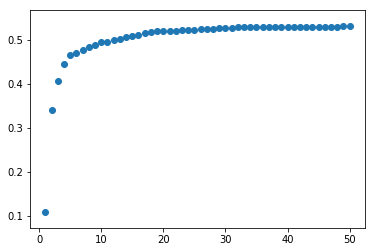

In [41]:
plt.scatter(sp.arange(1, 51, 1), cross_val.cv_results_["mean_test_score"])